# **Global Terrorism Analysis**

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. 

The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. 

The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

Dataset: https://www.kaggle.com/datasets/START-UMD/gtd

## Importing Dependencies

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [20]:
df=pd.read_csv("./Datasets/globalterrorismdb_0718dist.csv",encoding = "ISO-8859-1")

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_29304\1148280765.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("./Datasets/globalterrorismdb_0718dist.csv",encoding = "ISO-8859-1")


## Overview of Dataset

In [21]:
df.head().iloc[:,100:]

,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Shape of DataFrame

In [4]:
df.shape

(181691, 135)

## Data preprocessing

In [22]:
null_sum=(df.isnull().sum()/len(df))*100
percent_null=null_sum.sort_values(ascending=False)
type(percent_null)
high_null_column=percent_null[percent_null>=50]
less_than_50_null_column=percent_null[~percent_null.isin(high_null_column)]
print(f'Number of column where null value less than fifty percent {len(less_than_50_null_column)}')
less_null_column=less_than_50_null_column.index.to_list()
print(less_null_column)

Number of column where null value less than fifty percent 58
['nperps', 'nperpcap', 'nwoundte', 'weapdetail', 'nkillter', 'scite1', 'summary', 'claimed', 'nwoundus', 'nkillus', 'corp1', 'weapsubtype1', 'weapsubtype1_txt', 'nwound', 'targsubtype1', 'targsubtype1_txt', 'nkill', 'longitude', 'latitude', 'natlty1', 'natlty1_txt', 'target1', 'city', 'provstate', 'guncertain1', 'ishostkid', 'specificity', 'doubtterr', 'multiple', 'crit1', 'iyear', 'iday', 'imonth', 'targtype1_txt', 'gname', 'individual', 'dbsource', 'country', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY', 'extended', 'region_txt', 'country_txt', 'region', 'crit2', 'targtype1', 'weaptype1', 'weaptype1_txt', 'attacktype1_txt', 'attacktype1', 'vicinity', 'suicide', 'success', 'crit3', 'property', 'eventid']


In [23]:
new_df=df[less_null_column]

In [24]:
check=new_df.columns.to_list()

In [25]:
selected_columns_1=['eventid', 'iyear', 'imonth', 'iday','country_txt','region_txt','city','multiple', 'success', 'suicide', 
 'attacktype1_txt', 'targtype1_txt',  'targsubtype1_txt', 'corp1', 'target1', 'natlty1_txt', 'weaptype1_txt','nkill','nwoundus', 'claimed', 'individual', 'INT_LOG', 'doubtterr', 'INT_MISC', 'specificity','gname', 'ishostkid', 'INT_ANY', 'guncertain1', 'provstate']

In [26]:
len(check)-len(selected_columns_1)

28

In [27]:
print(list((set(check)) - (set(selected_columns_1))))

['longitude', 'property', 'country', 'INT_IDEO', 'nkillus', 'targsubtype1', 'natlty1', 'targtype1', 'crit1', 'crit3', 'attacktype1', 'scite1', 'weaptype1', 'crit2', 'vicinity', 'nperps', 'weapsubtype1_txt', 'region', 'weapsubtype1', 'extended', 'nperpcap', 'dbsource', 'nwound', 'weapdetail', 'nkillter', 'latitude', 'nwoundte', 'summary']


In [28]:
df_1=df[selected_columns_1]

In [13]:
df_1.T

,0,1,2,3,4,5,6,7,8,9,...,181681,181682,181683,181684,181685,181686,181687,181688,181689,181690
eventid,197000000001,197000000002,197001000001,197001000002,197001000003,197001010002,197001020001,197001020002,197001020003,197001030001,...,201712310016,201712310017,201712310018,201712310019,201712310020,201712310022,201712310029,201712310030,201712310031,201712310032
iyear,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
imonth,7,0,1,1,1,1,1,1,1,1,...,12,12,12,12,12,12,12,12,12,12
iday,2,0,0,0,0,1,2,2,2,3,...,31,31,31,31,31,31,31,31,31,31
country_txt,Dominican Republic,Mexico,Philippines,Greece,Japan,United States,Uruguay,United States,United States,United States,...,Philippines,Italy,Afghanistan,India,Afghanistan,Somalia,Syria,Philippines,India,Philippines
region_txt,Central America & Caribbean,North America,Southeast Asia,Western Europe,East Asia,North America,South America,North America,North America,North America,...,Southeast Asia,Western Europe,South Asia,South Asia,South Asia,Sub-Saharan Africa,Middle East & North Africa,Southeast Asia,South Asia,Southeast Asia
city,Santo Domingo,Mexico city,Unknown,Athens,Fukouka,Cairo,Montevideo,Oakland,Madison,Madison,...,Shariff Aguak,Spinetoli,Kohistan district,Hungrum,Maymana,Ceelka Geelow,Jableh,Kubentog,Imphal,Cotabato City
multiple,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
success,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,0,0
suicide,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
(df_1.isnull().sum()/len(df_1))*100

eventid              0.000000
iyear                0.000000
imonth               0.000000
iday                 0.000000
country_txt          0.000000
region_txt           0.000000
city                 0.238867
multiple             0.000550
success              0.000000
suicide              0.000000
attacktype1_txt      0.000000
targtype1_txt        0.000000
targsubtype1_txt     5.709144
corp1               23.418882
target1              0.350045
natlty1_txt          0.858050
weaptype1_txt        0.000000
nkill                5.676120
nwoundus            35.611010
claimed             36.391456
individual           0.000000
INT_LOG              0.000000
doubtterr            0.000550
INT_MISC             0.000000
specificity          0.003302
gname                0.000000
ishostkid            0.097969
INT_ANY              0.000000
guncertain1          0.209146
provstate            0.231712
dtype: float64

In [30]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   country_txt       181691 non-null  object 
 5   region_txt        181691 non-null  object 
 6   city              181257 non-null  object 
 7   multiple          181690 non-null  float64
 8   success           181691 non-null  int64  
 9   suicide           181691 non-null  int64  
 10  attacktype1_txt   181691 non-null  object 
 11  targtype1_txt     181691 non-null  object 
 12  targsubtype1_txt  171318 non-null  object 
 13  corp1             139141 non-null  object 
 14  target1           181055 non-null  object 
 15  natlty1_txt       180132 non-null  object 
 16  weaptype1_txt     18

## Exploratory Data Analysis

In [31]:
attack_per_year=df_1['iyear'].value_counts()

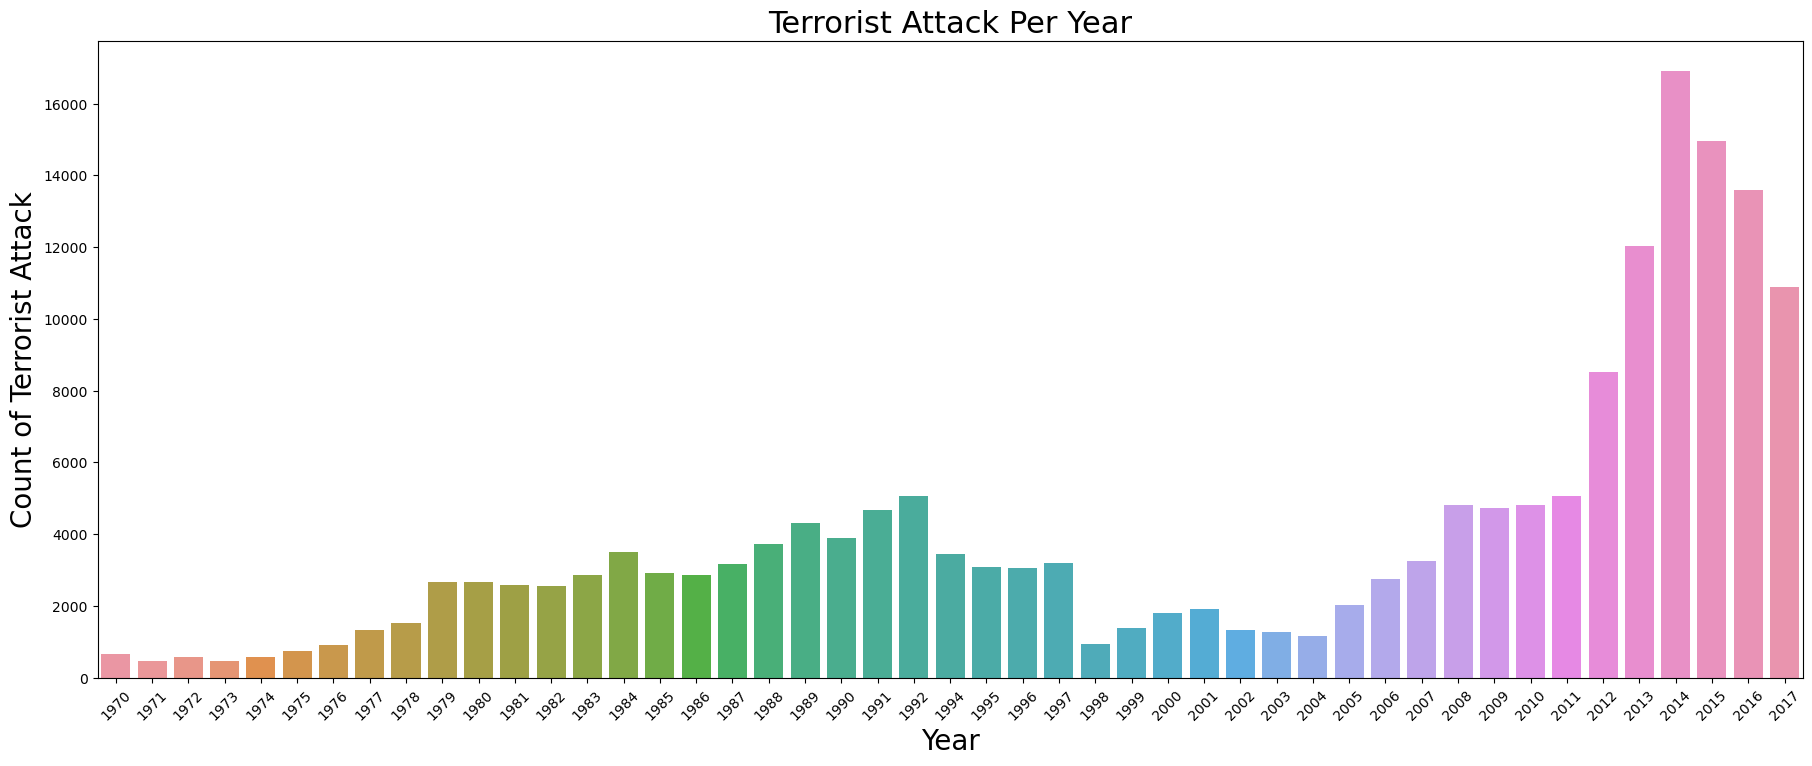

In [32]:
ax=plt.rcParams['figure.figsize'] = 22,8.27
ax=sns.countplot(x='iyear',data=df_1)
ax.set_xlabel('Year',fontsize=20)
plt.xticks(rotation = 45)
ax.set_ylabel('Count of Terrorist Attack',fontsize=20)
ax.set_title('Terrorist Attack Per Year',fontsize=22);

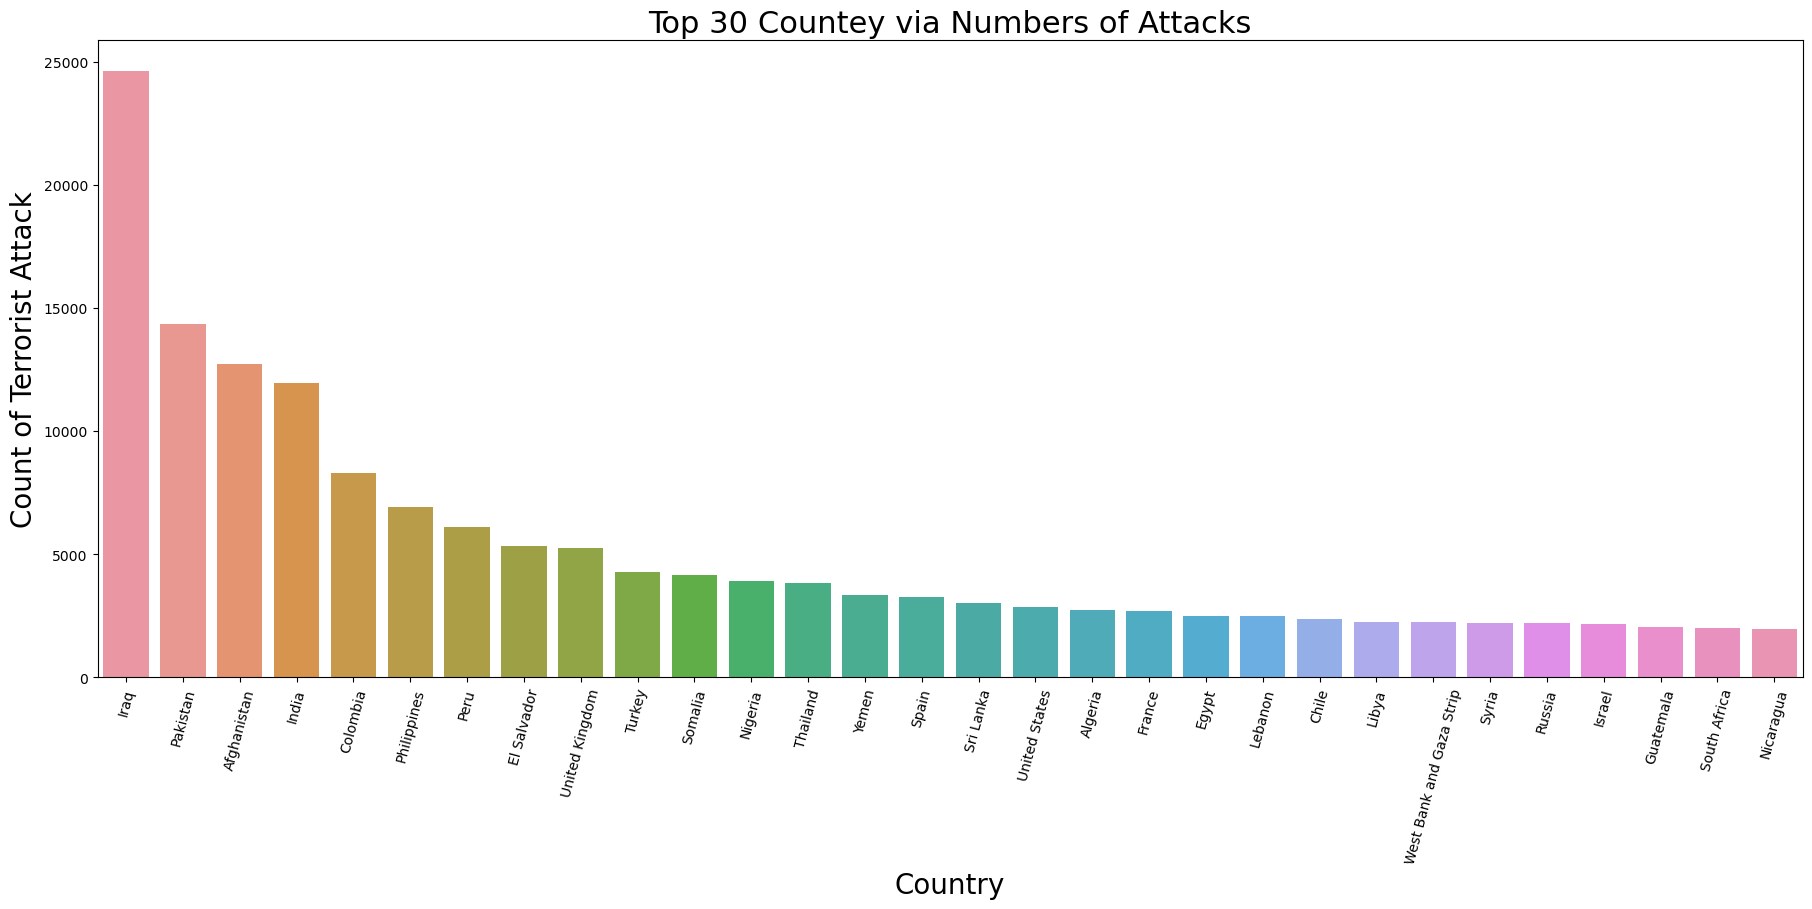

In [33]:
ax=plt.rcParams['figure.figsize'] = 22,8.27
ax=sns.countplot(x='country_txt',data=df_1,order = df_1['country_txt'].value_counts().index[:30])
ax.set_xlabel('Country',fontsize=20)
plt.xticks(rotation = 75)
ax.set_ylabel('Count of Terrorist Attack',fontsize=20)
ax.set_title('Top 30 Countey via Numbers of Attacks',fontsize=22);

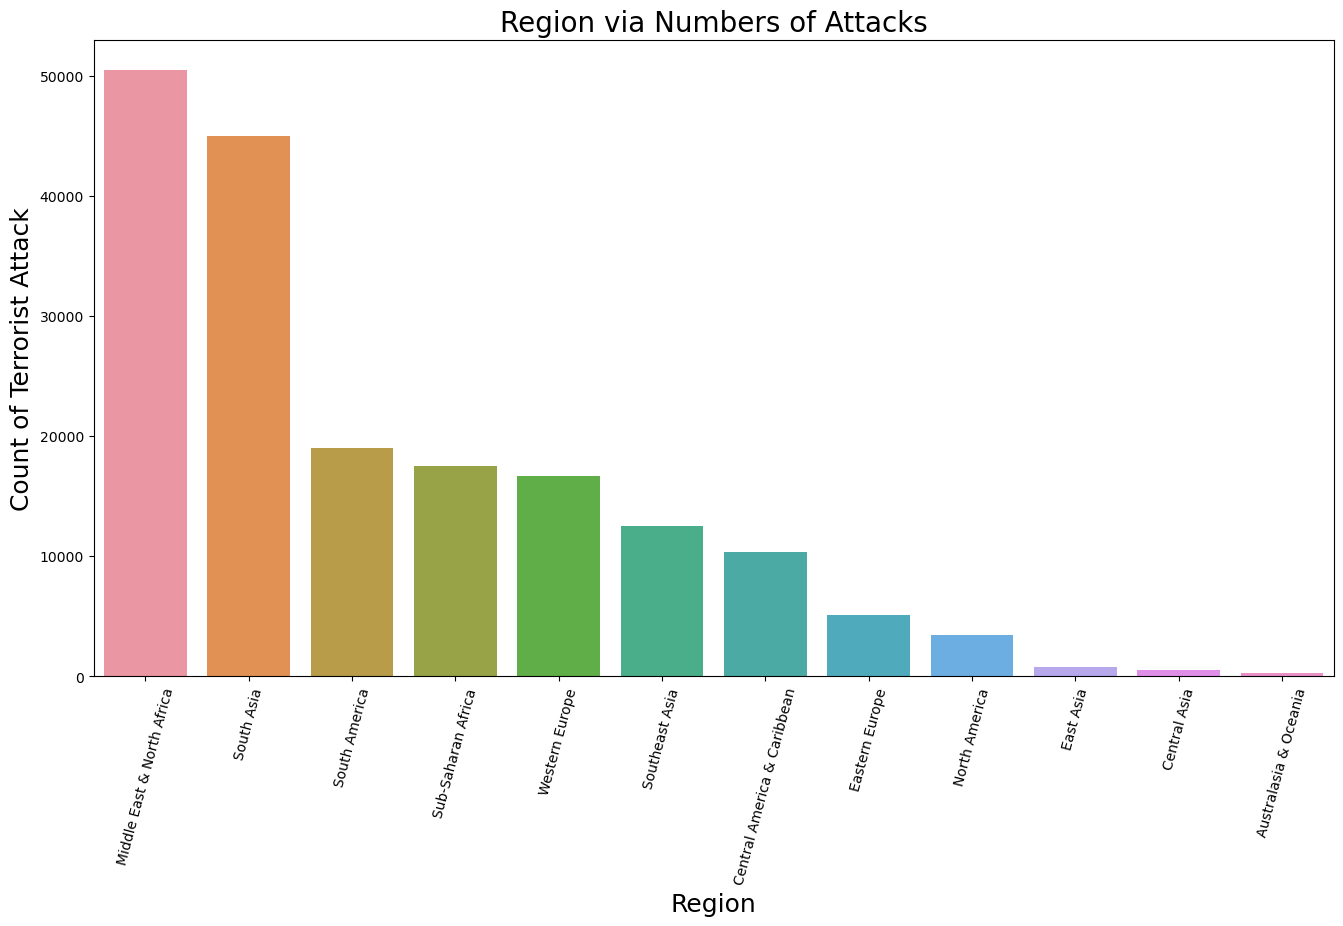

In [34]:
ax=plt.rcParams['figure.figsize'] = 16,8.27
ax=sns.countplot(x='region_txt',data=df_1,order = df_1['region_txt'].value_counts().index)
ax.set_xlabel('Region',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Count of Terrorist Attack',fontsize=18)
ax.set_title('Region via Numbers of Attacks',fontsize=20);

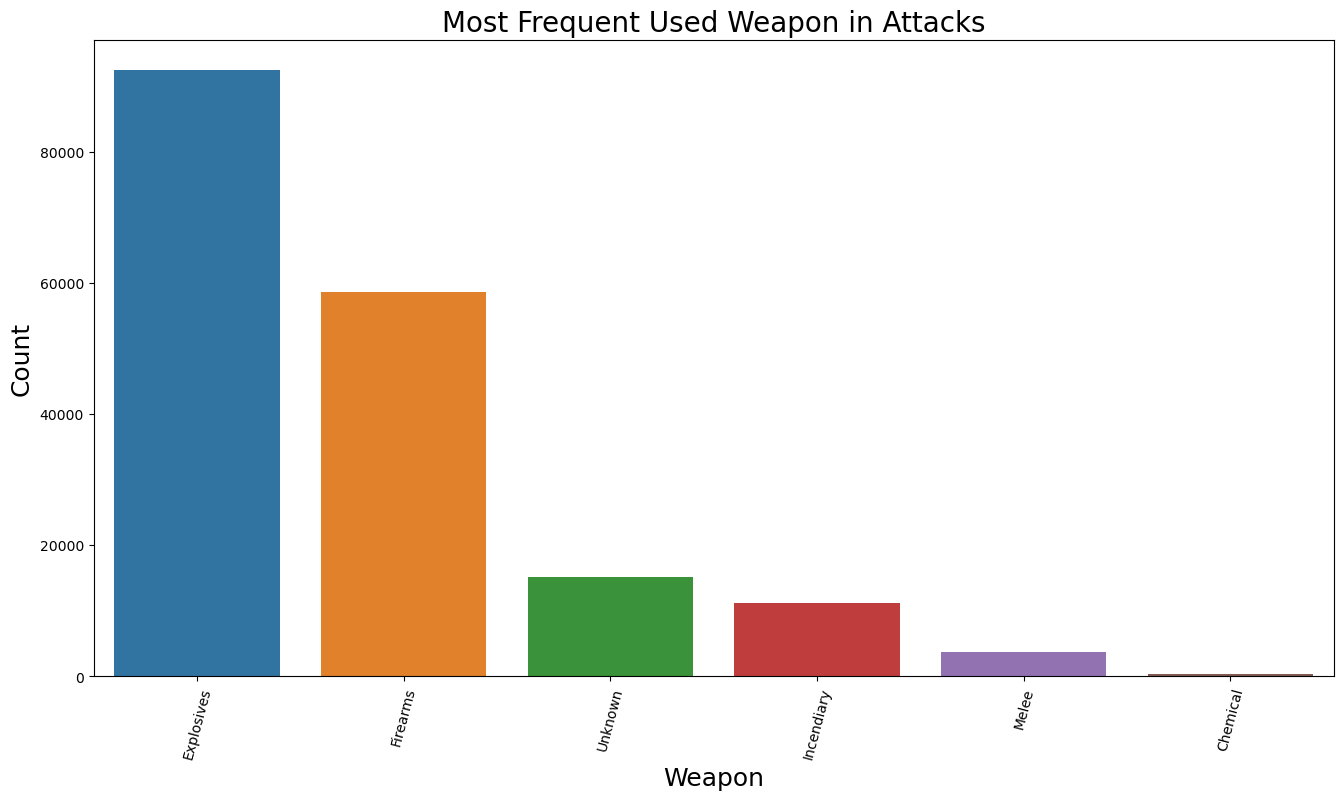

In [35]:
ax=plt.rcParams['figure.figsize'] = 16,8.27
ax=sns.countplot(x='weaptype1_txt',data=df_1,order = df_1['weaptype1_txt'].value_counts().index[:6])
ax.set_xlabel('Weapon',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Count',fontsize=18)
ax.set_title('Most Frequent Used Weapon in Attacks',fontsize=20);

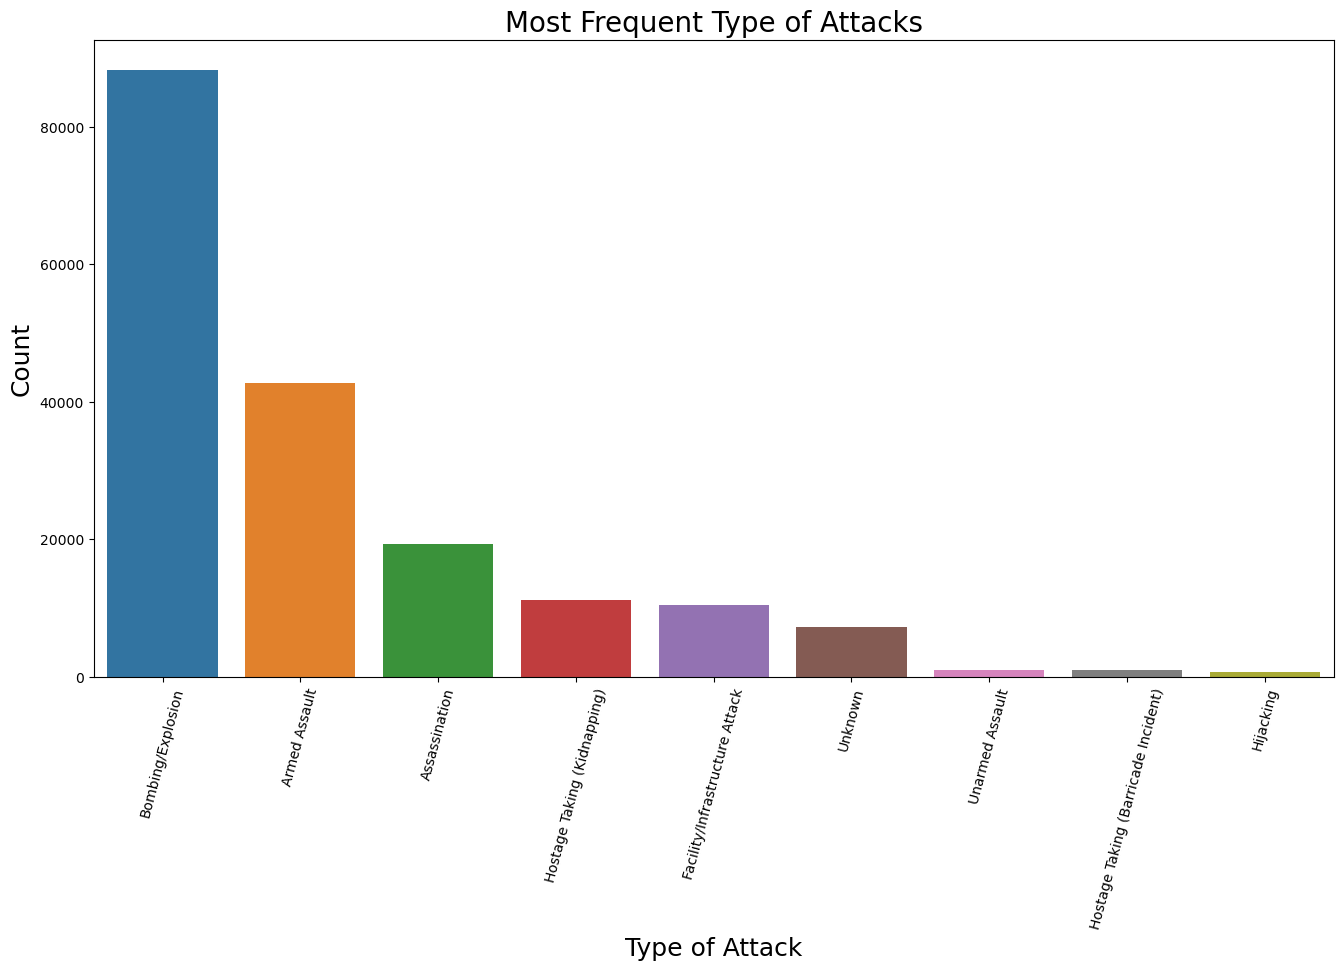

In [36]:
ax=plt.rcParams['figure.figsize'] = 16,8.27
ax=sns.countplot(x='attacktype1_txt',data=df_1,order = df_1['attacktype1_txt'].value_counts().index)
ax.set_xlabel('Type of Attack',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Count',fontsize=18)
ax.set_title('Most Frequent Type of Attacks',fontsize=20);

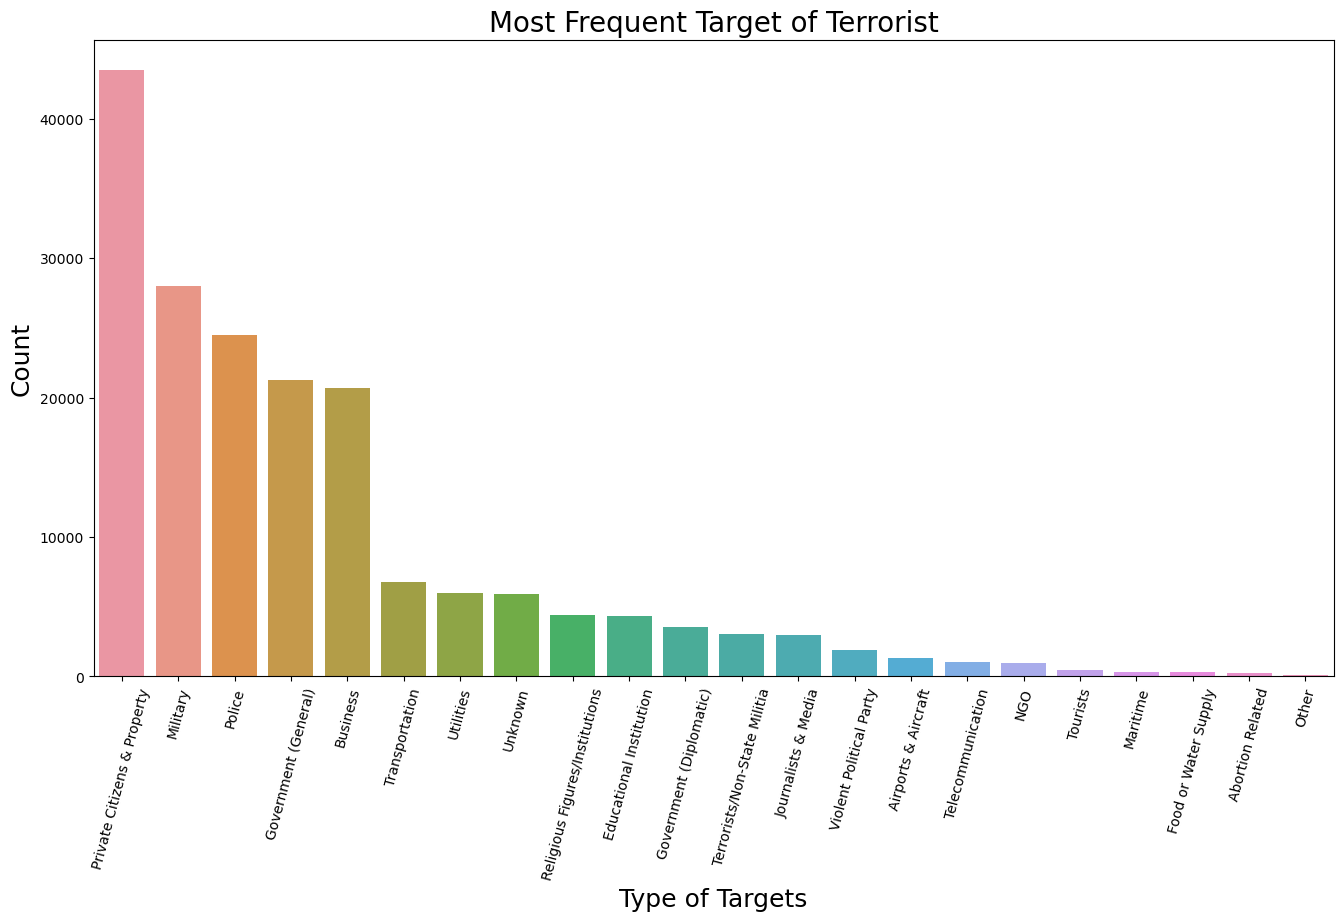

In [37]:
ax=plt.rcParams['figure.figsize'] = 16,8.27
ax=sns.countplot(x='targtype1_txt',data=df_1,order = df_1['targtype1_txt'].value_counts().index)
ax.set_xlabel('Type of Targets',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Count',fontsize=18)
ax.set_title('Most Frequent Target of Terrorist',fontsize=20);

In [38]:
df_1['gname'].value_counts()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Ansar Sarallah                                          1
Sword of Islam                                          1
Support of Ocalan-The Hawks of Thrace                   1
Arab Revolutionary Front                                1
MANO-D                                                  1
Name: gname, Length: 3537, dtype: int64

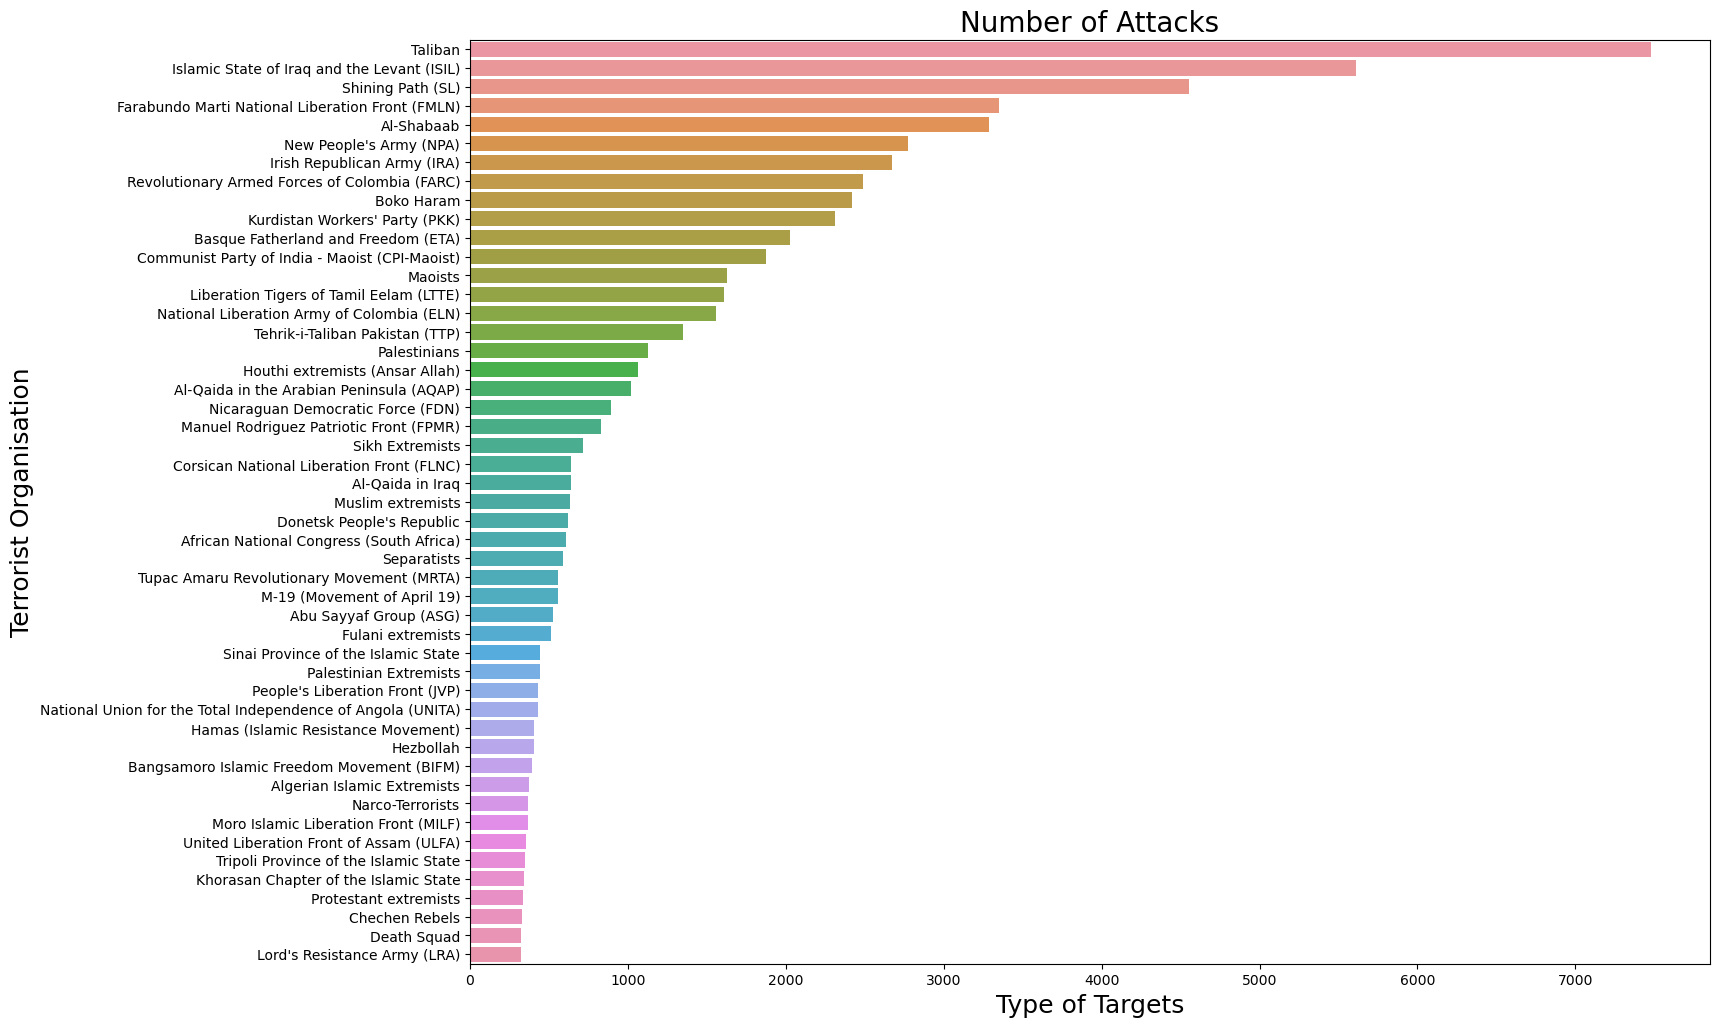

In [39]:
ax=plt.rcParams['figure.figsize'] = 16,12
ax=sns.countplot(y='gname',data=df_1,order = df_1['gname'].value_counts().index[1:50])
ax.set_xlabel('Type of Targets',fontsize=18)
# plt.yticks(rotation = 75)
ax.set_ylabel('Terrorist Organisation',fontsize=18)
ax.set_title('Number of Attacks',fontsize=20);

In [40]:
print('\n')
print(('*')*20)
print('Value count of Object Type Category which if greater than 50')
print('\n')
print(('*')*20)
cat_col=df_1.select_dtypes('object').columns.to_list()
for col in cat_col:
  if len(df_1[col].value_counts())<50:
    print(df_1[col].value_counts())
    print('\n')
    print(('*')*20)
 



********************
Value count of Object Type Category which if greater than 50


********************
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64


********************
Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                          

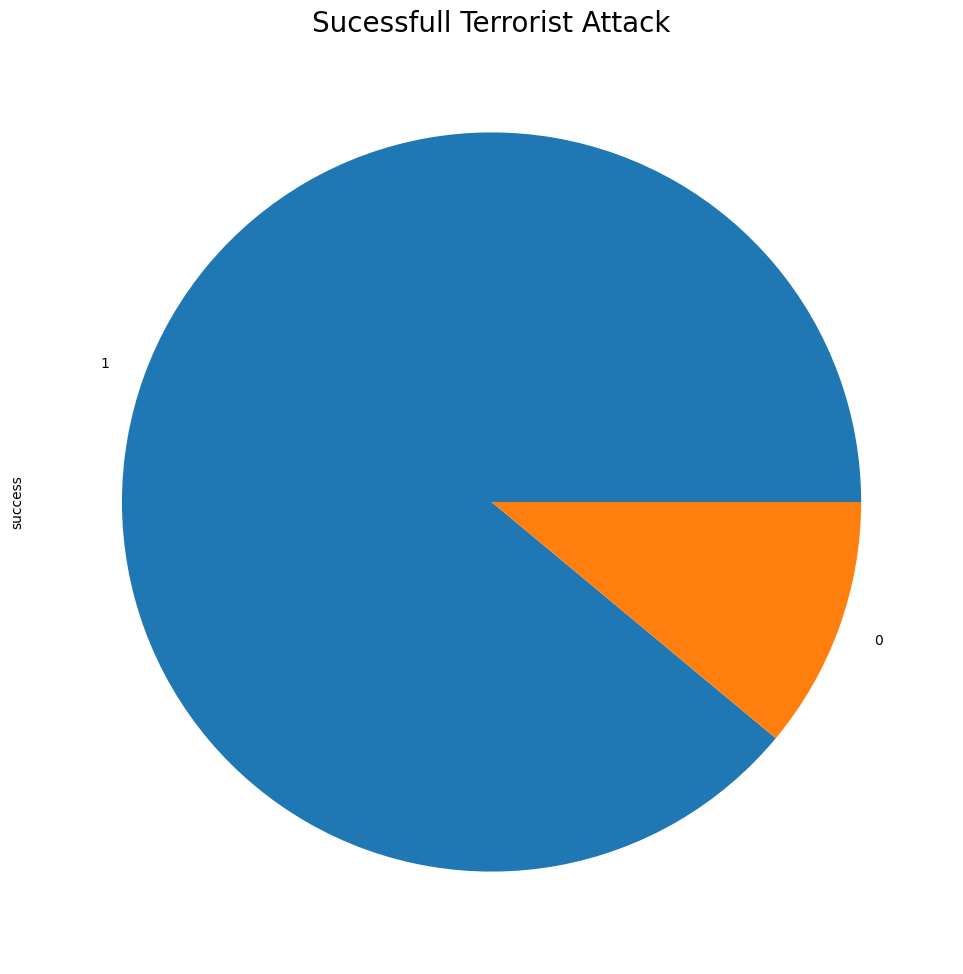

In [43]:
ax=df_1['success'].value_counts().plot(kind='pie')
ax.set_title('Sucessfull Terrorist Attack',fontsize=20);

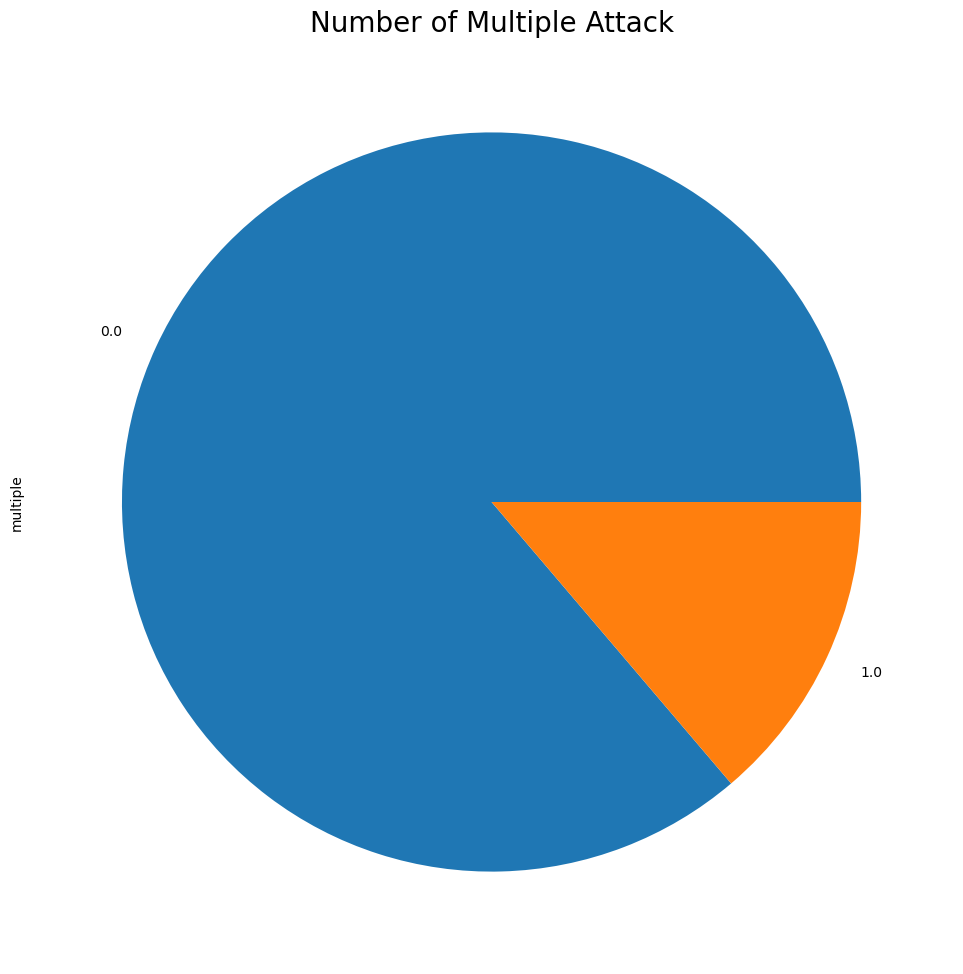

In [44]:
ax=df_1['multiple'].value_counts().plot(kind='pie')
ax.set_title('Number of Multiple Attack',fontsize=20);

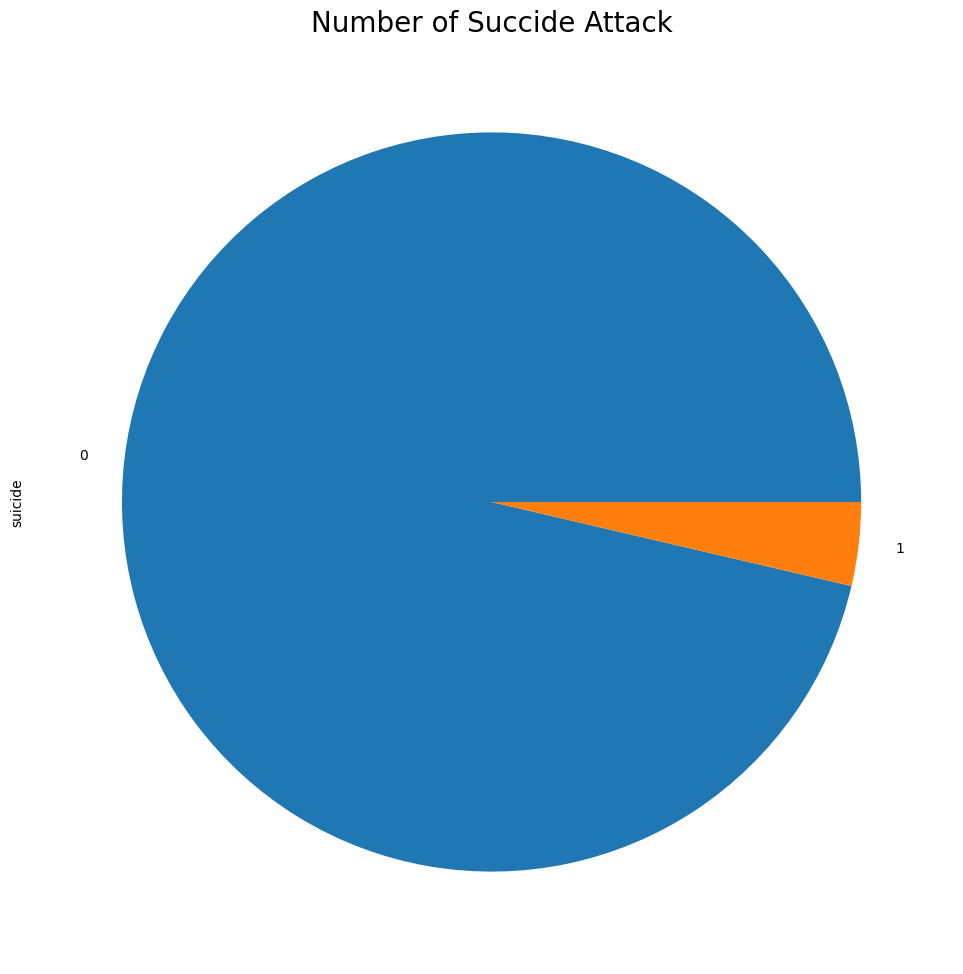

In [45]:
ax=df_1['suicide'].value_counts().plot(kind='pie')
ax.set_title('Number of Succide Attack',fontsize=20);

## Countries Perfomance Against Terrorist Atatcks

In [51]:
suceess_country=df_1.groupby('country_txt').agg({'eventid':'count','success':'sum'}).reset_index()
suceess_country.columns=['Country','Total_Attacks','Attack_Success']
suceess_country['Attack_Failed']=suceess_country['Total_Attacks']-suceess_country['Attack_Success']
suceess_country['Failure_Rate_Attack']=(suceess_country['Attack_Failed']/suceess_country['Total_Attacks'])*100
suceess_country['Success_Rate_Attack']=(suceess_country['Attack_Success']/suceess_country['Total_Attacks'])*100
suceess_country=suceess_country.round(2)

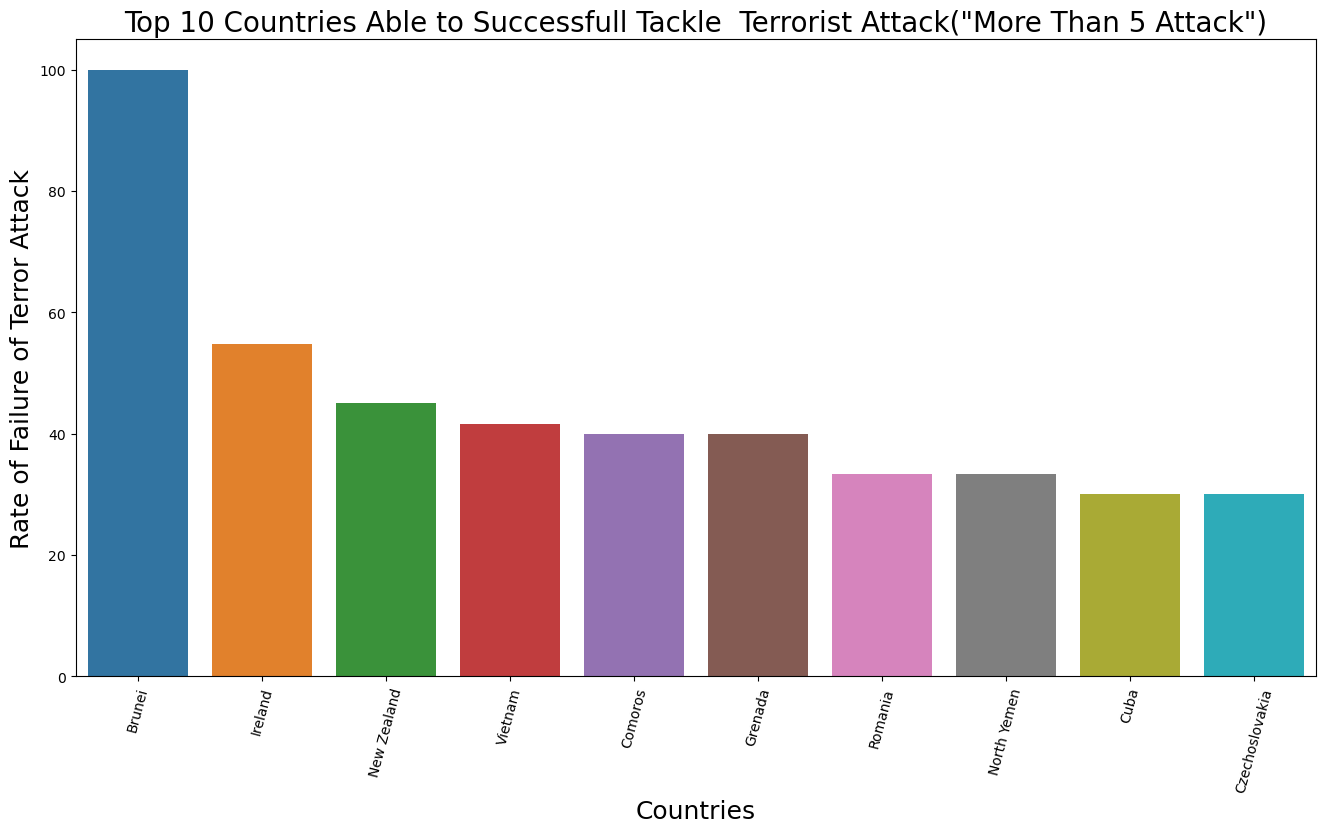

In [52]:
able_stop_terror_attack=suceess_country[suceess_country['Total_Attacks']>=5].sort_values('Failure_Rate_Attack',ascending=False )[:10]
plot_able_stop_terror_attack=able_stop_terror_attack.loc[:,['Country','Failure_Rate_Attack']]
ax=plt.rcParams['figure.figsize'] = 16,8.27
ax=sns.barplot(x='Country',y='Failure_Rate_Attack',data=plot_able_stop_terror_attack)
ax.set_xlabel('Countries',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Rate of Failure of Terror Attack',fontsize=18)
ax.set_title('Top 10 Countries Able to Successfull Tackle  Terrorist Attack("More Than 5 Attack")',fontsize=20);

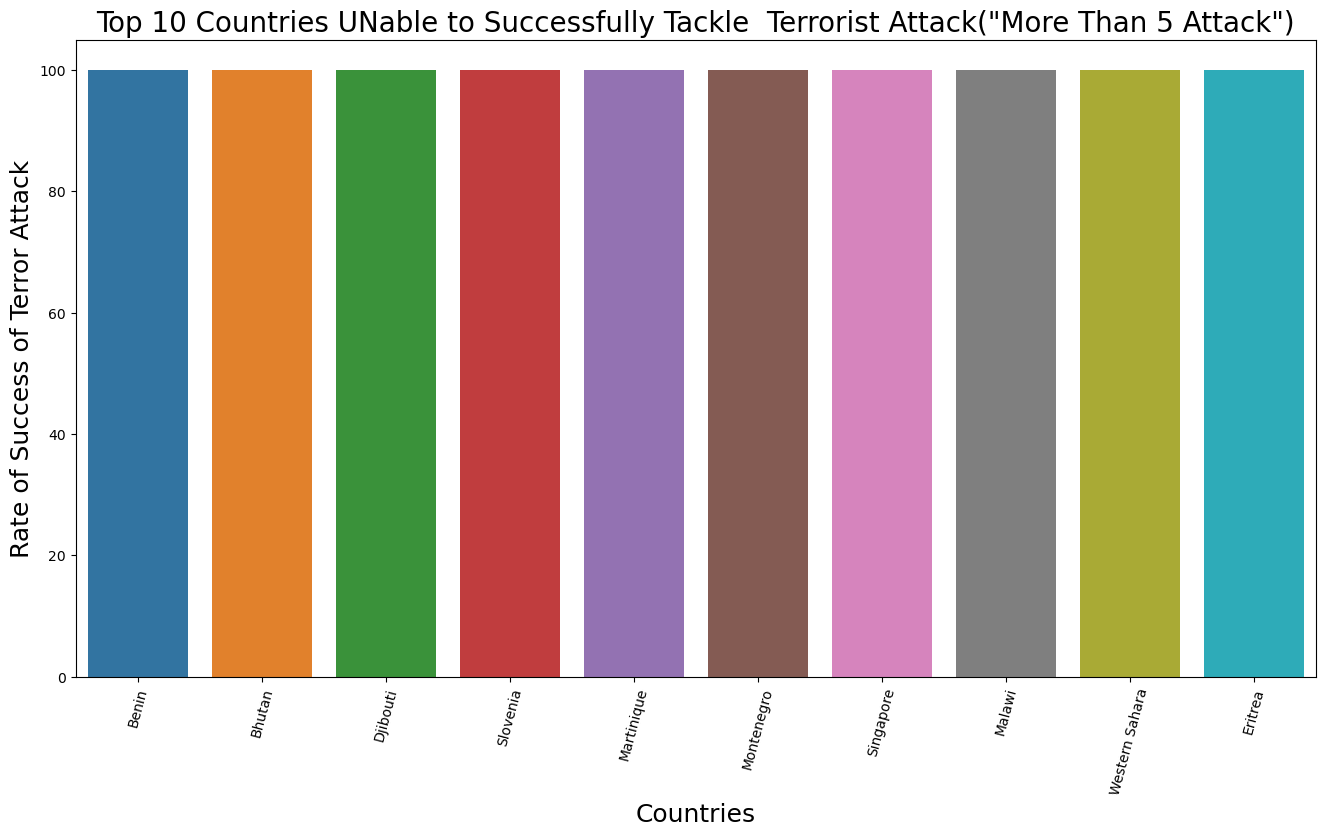

In [53]:
unable_stop_terror_attack=suceess_country[suceess_country['Total_Attacks']>=5].sort_values('Success_Rate_Attack',ascending=False )[:10]
plot_unable_stop_terror_attack=unable_stop_terror_attack.loc[:,['Country','Success_Rate_Attack','Total_Attacks']]
ax=plt.rcParams['figure.figsize'] = 16,8.27
ax=sns.barplot(x='Country',y='Success_Rate_Attack',data=plot_unable_stop_terror_attack)
ax.set_xlabel('Countries',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Rate of Success of Terror Attack',fontsize=18)
ax.set_title('Top 10 Countries UNable to Successfully Tackle  Terrorist Attack("More Than 5 Attack")',fontsize=20);

## Trend in Terrorist Attacks ( is their any change in between these years )

In [54]:
attack_per_year=df_1.groupby(['iyear','targtype1_txt','target1','success','weaptype1_txt','gname'])['eventid'].count().to_frame(name = 'Total_Attacks').reset_index()

E:\projects\Data_Science\Sample_project1\env\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
E:\projects\Data_Science\Sample_project1\env\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
E:\projects\Data_Science\Sample_project1\env\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
E:\projects\Data_Science\Sample_project1\env\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
E:\projects\Data_Science\Sample_project1\env\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. U

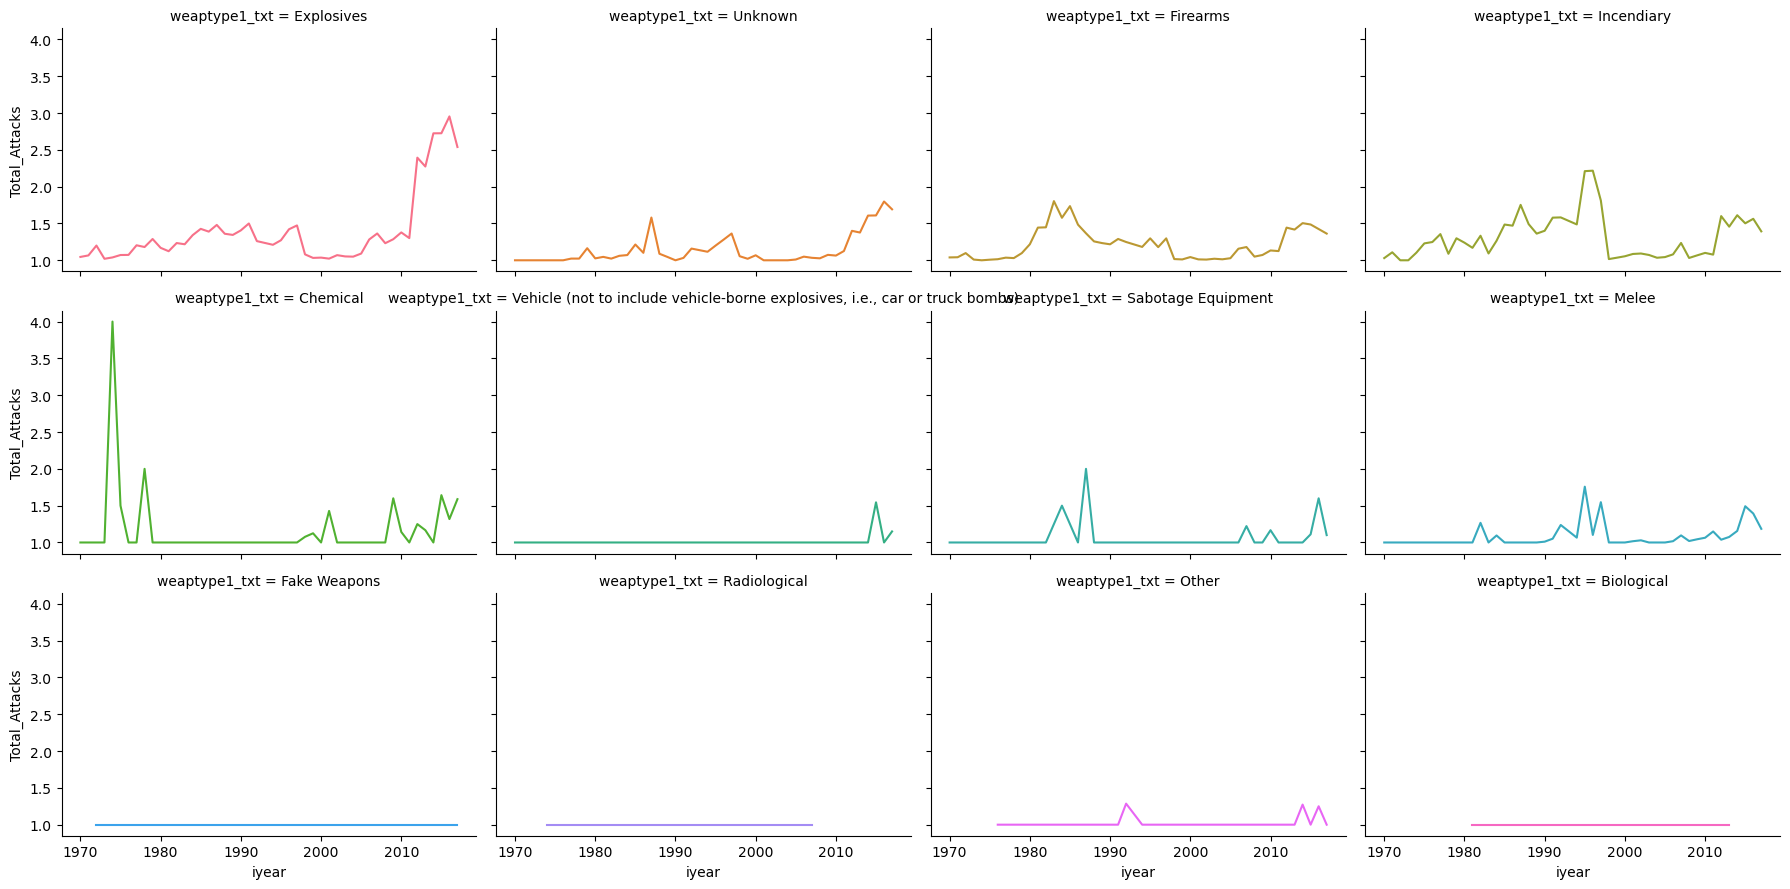

In [55]:
ax = sns.relplot(col="weaptype1_txt", y="Total_Attacks",col_wrap=4, hue='weaptype1_txt',x="iyear",kind='line', ci=None ,data=attack_per_year, height=3, aspect=1.5, legend=False)

E:\projects\Data_Science\Sample_project1\env\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
E:\projects\Data_Science\Sample_project1\env\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
E:\projects\Data_Science\Sample_project1\env\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
E:\projects\Data_Science\Sample_project1\env\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
E:\projects\Data_Science\Sample_project1\env\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. U

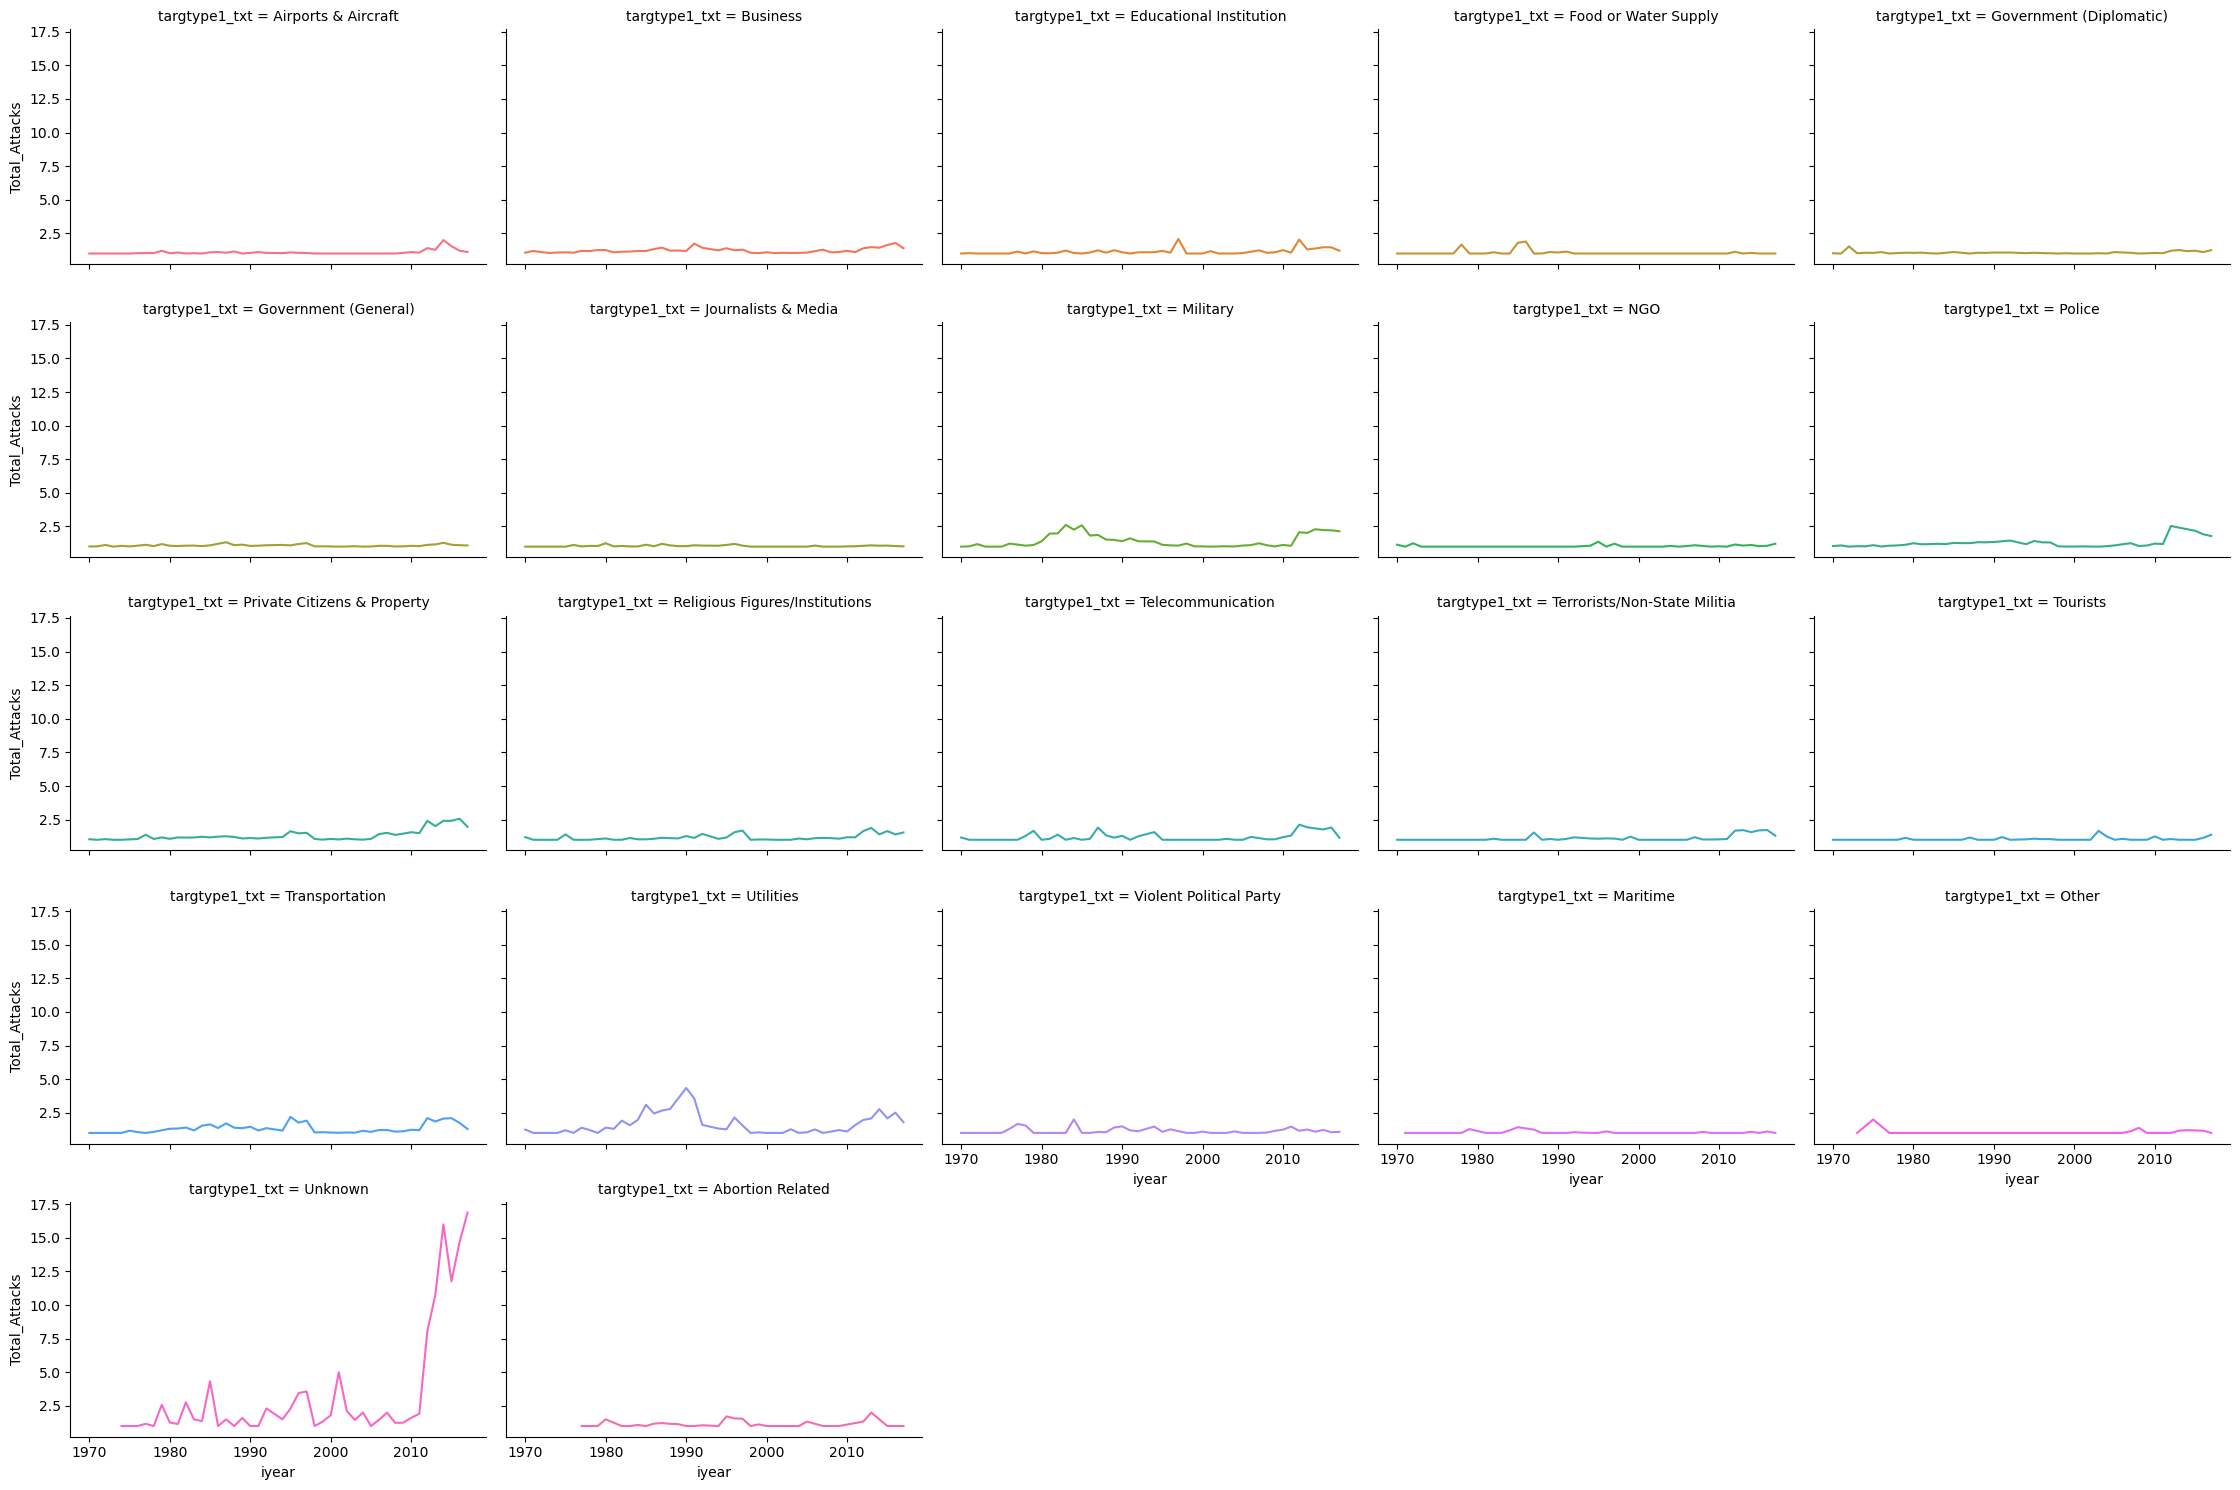

In [57]:
ax = sns.relplot(col="targtype1_txt", y="Total_Attacks",col_wrap=5, hue='targtype1_txt',x="iyear",kind='line', ci=None ,data=attack_per_year, height=3, aspect=1.5, legend=False)
# ax.tick_params(rotation=45)